## Why Python for Statistics
R is a language dedicated to statistics. **Python is a general-purpose** language with statistics modules. R has more statistical analysis features than Python, and specialized syntaxes. However, when it comes to building complex analysis pipelines that mix statistics with e.g. image analysis, text mining, or control of a physical experiment, the richness of Python is an invaluable asset.

The setting that we consider for statistical analysis is that of multiple observations or samples described by a set of different attributes or features. The data can than be seen as a 2D table, or matrix, with columns giving the different attributes of the data, and rows the observations.

---
### Welcome Pandas Data Frame

We will store and manipulate this data in a pandas.DataFrame, from the pandas module. It is the Python equivalent of the spreadsheet table. It is different from a 2D numpy array as it has named columns, can contain a mixture of different data types by column, and has elaborate selection and pivotal mechanisms.

---

### Reading from csv File
Reading from a CSV file: Using the above CSV file that gives observations of brain size and weight and IQ, the data are a mixture of numerical and categorical values.

---
### Missing values

The weight of the second individual is missing in the CSV file. If we don’t specify the missing value (NA = not available) marker, we will not be able to do statistical analysis.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./brain_size.csv', sep=';', na_values='.')

In [3]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [4]:
data.shape

(40, 8)

In [5]:
data.mean()

Unnamed: 0        20.500000
FSIQ             113.450000
VIQ              112.350000
PIQ              111.025000
Weight           151.052632
Height            68.525641
MRI_Count     908755.000000
dtype: float64

In [6]:
data.VIQ.values

array([132, 150, 123, 129, 132,  90, 136,  90,  93, 114, 129, 150, 129,
       120, 100,  71, 132,  96, 112,  77,  83, 107, 129, 145,  86, 145,
        90,  96,  83, 126, 126, 145,  96,  96,  90, 129, 150,  86,  90,  91])

In [10]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

In [11]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [12]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


## Scipy package

The scipy package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

scipy can be compared to other standard scientific-computing libraries, such as the GSL (GNU Scientific Library for C and C++), or Matlab’s toolboxes. scipy is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that numpy and scipy work hand in hand.

---
|Moudule name| Usage
|---|---
| scipy.cluster	| Vector quantization / Kmeans
| scipy.constants | Physical and mathematical constants
| scipy.fftpack|Fourier transform
| scipy.integrate |Integration routines
|scipy.interpolate|Interpolation
|scipy.io|Data input and output
|scipy.linalg|Linear algebra routines
|scipy.ndimage|n-dimensional image package
|scipy.odr|Orthogonal distance regression
|scipy.optimize|Optimization
|scipy.signal|Signal processing
|scipy.sparse|Sparse matrices
|scipy.spatial|Spatial data structures and algorithms
|scipy.special|Any special mathematical functions
|scipy.stats|Statistics

---

## Scipy.stats

The module scipy.stats contains statistical tools and probabilistic descriptions of random processes. Random number generators for various random process can be found in numpy.random.


### Histogram and probability density function
Given observations of a random process, their histogram is an estimator of the random process’s PDF (probability density function):


In [7]:
a = np.random.normal(size=1000)
bins = np.arange(-4, 5)
bins


array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [8]:
histogram = np.histogram(a, bins=bins, normed=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
bins


array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

In [9]:
from scipy import stats
b = stats.norm.pdf(bins)  # norm is a distribution

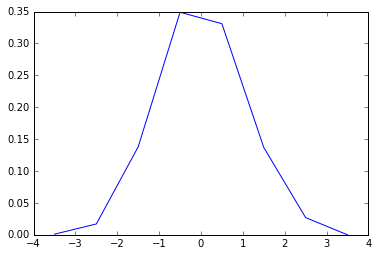

In [10]:
plt.plot(bins, histogram) 

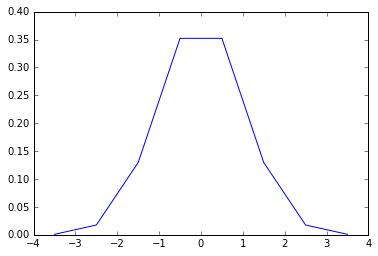

In [11]:
plt.plot(bins, b) 

### Percentiles
The median is the value with half of the observations below, and half above. It is also called the percentile 50, because 50% of the observation are below it.

In [12]:
np.median(a)

-0.005631578138667063

In [13]:
stats.scoreatpercentile(a, 50) 

-0.005631578138667063

In [14]:
stats.scoreatpercentile(a, 90) 

1.2824794249692093

## Hypothesis testing: comparing two groups
#### 1-sample t-test: testing the value of a population mean

[scipy.stats.ttest_1samp()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp) tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value (see the function’s help):


In [15]:
stats.ttest_1samp?

In [16]:
stats.ttest_1samp(data['VIQ'], 0) 

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

With a p-value of 10^-28 we can claim that the population mean for the IQ (VIQ measure) is not 0.
 
#### 2-sample t-test: testing for difference across populations
We have seen above that the mean VIQ in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind():

In [17]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)

## Statsmodel
statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are avalable for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license.

---


In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
dat.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [20]:
dat.columns

Index([u'dept', u'Region', u'Department', u'Crime_pers', u'Crime_prop',
       u'Literacy', u'Donations', u'Infants', u'Suicides', u'MainCity',
       u'Wealth', u'Commerce', u'Clergy', u'Crime_parents', u'Infanticide',
       u'Donation_clergy', u'Lottery', u'Desertion', u'Instruction',
       u'Prostitutes', u'Distance', u'Area', u'Pop1831'],
      dtype='object')

In [21]:
# Fit regression model (using the natural log of one of the regressors)
# Ordinary least squares
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()


In [22]:
print results.summary()


                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sun, 26 Mar 2017   Prob (F-statistic):           1.90e-08
Time:                        09:41:08   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [23]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

In [24]:
model = smf.ols("y ~ x", data).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sun, 26 Mar 2017   Prob (F-statistic):           8.56e-08
Time:                        09:41:31   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.000        -7.710    -3.357
x              2.9369      0.341      8.604      0.000         2.220     3.654
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   2.956
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.322
Skew:                          -0.058   Prob(JB):                        0.851
Kurtosis:                       2.390   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## More visualization: seaborn for statistical exploration
Seaborn combines simple statistical fits with plotting on pandas dataframes.
Seaborn changes the default of matplotlib figures to achieve a more “modern”, “excel-like” look. It does that upon import. 

Let us consider a data giving wages and many other personal information on 500 individuals ([Berndt, ER. The Practice of Econometrics. 1991. NY: Addison-Wesley](http://lib.stat.cmu.edu/datasets/CPS_85_Wages)).

In [26]:
import os, urllib

In [27]:
if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',\
                       'wages.txt')

In [28]:
# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]


In [29]:
short_names = [n.split(':')[0] for n in names]


In [30]:
data = pd.read_csv('wages.txt', skiprows=27, skip_footer=6, sep=None, header=None)

/home/salman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [31]:
data.columns=short_names

In [32]:
data.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,5.10,35,2,6,1,1
1,9,0,1,42,0,4.95,57,3,6,1,1
2,12,0,0,1,0,6.67,19,3,6,1,0
3,12,0,0,4,0,4.00,22,3,6,0,0
4,12,0,0,17,0,7.50,35,3,6,0,1


In [33]:
data['WAGE'] = np.log10(data['WAGE']) # scaling values

In [34]:
!pip install seaborn

In [35]:
import seaborn as sn

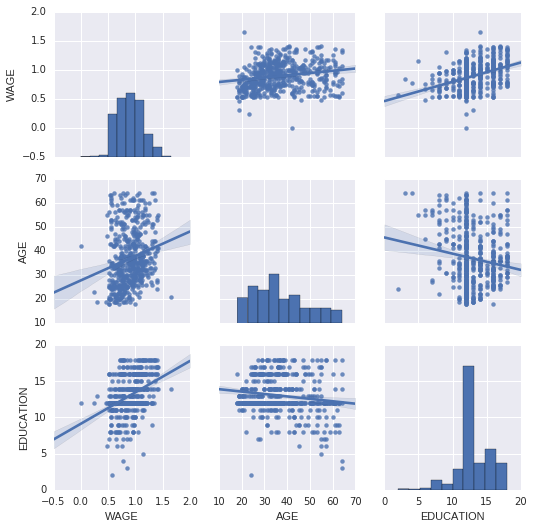

In [36]:
sn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg')

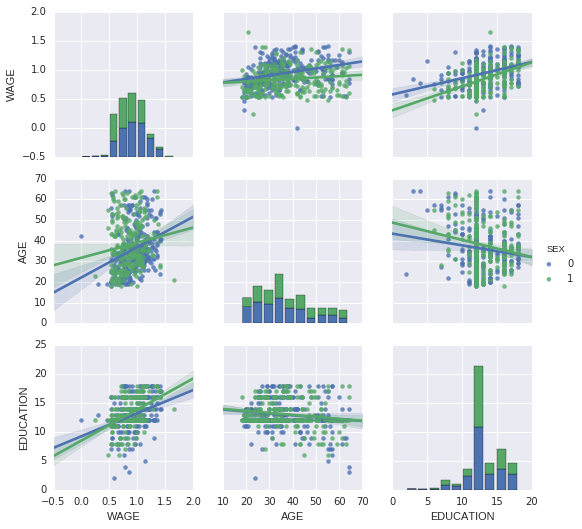

In [37]:
# Plotting against CATEGORICAL VARIABLES
sn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='SEX')

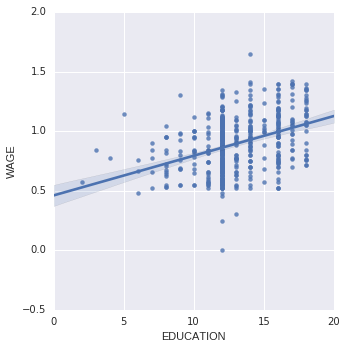

In [38]:
# A regression capturing the relation between one variable and another, 
# eg wage and eduction, can be plotted using seaborn.lmplot():

sn.lmplot(y='WAGE', x='EDUCATION', data=data)  